# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо установить параметры ля определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Для изучения данных выведем таблицу методом display.

In [ ]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv')
display(df)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


Данные читать очень сложно так как колонки "склеились". Вызовем повторно датафрейм используя разделитель колонок 'sep'.

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Сразу видно множество пропусков в датафрейме. На этапе предобработки данных выявим все пропуски и проанализируем возможность их замены на какие-либо данные.

## Предобработка данных

Проверим пропуски методом isna.

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Множественные пропуски в многих колонках.

### Начнем с высоты потолков(celling_height). Построим гистограмму, чтобы понять как распределяются имеющиеся значения высоты потолка.

<AxesSubplot:>

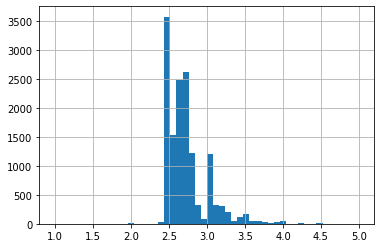

In [ ]:
df['ceiling_height'].hist(bins=50, range=(1, 5))

Методом describe посмотрим минимальное, максимальное, медианное значения, а так же стандартную величину  отклонения.

In [ ]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Посчитаем количество уникальных значении в столбце.

In [ ]:
df['ceiling_height'].nunique()

183

183 различных величины высоты потолка следует сгруппировать на 4 категории. 

1-я категория до 2.4 м., 4-я категооря свыше 3.6 м. - объявления с указанной высотой встречаются крайне редко, что показывает гистограмма.

2-я категория ("ящик") - от 2.4 до 2.8 м -самая часто встречающаяся категория объвлений, кроме того и медианное и средние значения входят в этот промежуток, поэтому если мы заменим пропуски в таблице указанной категорией, общее искажение финального результата будет маловероятным.

3-я категория от 2.9 до 3.6 метров.

In [ ]:
def ceiling_category(row):
    category = row['ceiling_height']
    if (category < 2.4):
        return '<2.4'
    if (2.4 <= category < 2.8):
        return '2.4-2.8'
    if (2.9 <= category < 3.6):
        return '2.9-3.6'
    if (category >= 3.6):
        return 'more 3.6'
    else:
        return '2.4-2.8'
df['ceiling_height_category'] = df.apply(ceiling_category, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.4-2.8
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.4-2.8
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2.4-2.8
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2.4-2.8
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2.9-3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,more 3.6
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2.4-2.8
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4-2.8
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2.9-3.6


Убедимся, что все значения в колонке ceiling_height категоризированы.

In [ ]:
df['ceiling_height_category'].unique()

array(['2.4-2.8', '2.9-3.6', 'more 3.6', '<2.4'], dtype=object)

### Посмотрим сколько всего населенных пунктов в датафрейме.

In [ ]:
df['locality_name'].nunique()

364

364 населенных пункта - это очень много, стоит отсеить населенные пункты с малым количеством объявлений.

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')


In [ ]:
cities = df.pivot_table(index='locality_name', values='total_images', aggfunc='count')
cities.columns = ['count']
cities = cities.sort_values('count', ascending=False)
print(cities.head(30))

                           count
locality_name                   
Санкт-Петербург            15721
поселок Мурино               556
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
поселок Бугры                114
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное  

Оставим в датафрейме населенные пункты где не менее 30 объявлений, так как на мой взгляд меньшее количество объявлений не позволит определить закономерности. Кроме того малое количество объявлений говорит о небольшом размере населенного пункта, где стоимость объекта недвижимости не всегда диктуется рыночной стоимостью.

In [ ]:
good_cities = cities.query('count > 29')
df = df.query('locality_name in @good_cities.index')
#print(good_cities)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22105 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             22105 non-null  int64  
 1   last_price               22105 non-null  float64
 2   total_area               22105 non-null  float64
 3   first_day_exposition     22105 non-null  object 
 4   rooms                    22105 non-null  int64  
 5   ceiling_height           13625 non-null  float64
 6   floors_total             22023 non-null  float64
 7   living_area              20395 non-null  float64
 8   floor                    22105 non-null  int64  
 9   is_apartment             2614 non-null   object 
 10  studio                   22105 non-null  bool   
 11  open_plan                22105 non-null  bool   
 12  kitchen_area             20018 non-null  float64
 13  balcony                  11369 non-null  float64
 14  locality_name         

Указанным действием мы потеряли около 1500 объявлений. Достаточно много...

### Снова обратимся к пропускам. Изучим данные связанные с местоположением.

In [ ]:
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height              8480
floors_total                  82
living_area                 1710
floor                          0
is_apartment               19491
studio                         0
open_plan                      0
kitchen_area                2087
balcony                    10736
locality_name                  0
airports_nearest            4063
cityCenters_nearest         4040
parks_around3000            4039
parks_nearest              14057
ponds_around3000            4039
ponds_nearest              13055
days_exposition             2858
ceiling_height_category        0
dtype: int64

Бросается в глаза примерно равное количество пропусков в колонках связанных с местоположением. Вероятнее всего в объявлениях просто отсутствовал адрес помещения (возможно агентства скрывают либо продавцы просто не указывали) так как указанные данные по условиям задачи заполняются автоматически при помощи сервиса "карты", либо пропуски связаны с некорректной работай сервиса. 

Игнорировать пропуски мы не можем, так как по условию задачи нам необходимо определить связь стоимости недвижимости с ее месторасположением.

Попробуем найти закономерности между отсутствием расстояния до центра и конкретными населенными пунктами.

In [ ]:
print(df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='count'))

                                         cityCenters_nearest
locality_name                                               
Волосово                                                   0
Волхов                                                     0
Всеволожск                                                 0
Выборг                                                     0
Гатчина                                                    0
Кингисепп                                                  0
Кириши                                                     0
Кировск                                                    0
Колпино                                                  337
Коммунар                                                   0
Красное Село                                             176
Кронштадт                                                 95
Кудрово                                                    0
Ломоносов                                                132
Луга                    

<font size="3"> Действительно, даже некоторые крупные города с большим количеством объявлений не имеют никаких данных связанных с растоянием до центра. Вероятнее всего либо сервис карты работает некорректно, либо выполняет расчет только для определенных населенных пунктов, возможно, входящих в административный округ Санкт-Петербурга. </font>

На стадии предобработки не думаю, что есть необходимость как-то корректировать или удалять пропущенные значения, даже несмотря на тот факт что они являются критическими.

Так же мы видим практически половину пропусков в столбцах parks_nearest и ponds_nearest. В то же время есть полная информация о колличестве вышеуказанных объектов в пределах трех километров. Врядли информация о пруде или парке расположенном далее чем три километра может повлиять на стоимость объекта, поэтому столбцы с таким большим колличеством пропущенных данных следует либо удалить либо игнорировать. На мой взгляд лучше удалить, так как таблица имеет много колонок, соответственно ненужные столбцы будут отвлекать

In [ ]:
df = df.drop(columns = ['parks_nearest', 'ponds_nearest']).reset_index(drop=True)

### Балконы.

Далее мы имеем более 10 тысяч пропусков к столбце балконы. Очевидно, если продавец не указал количество балконов, их просто нет. Соответственно мы можем заполнить пропуски нулями методом fillna(). Перед этим изменим возможные строки методов to_numeric.

После заполнения пропусков изменим дробные числа на целые методом astype, так как врядли количество балконов может ваыражаться нецелым числом.

In [ ]:
pd.to_numeric(df['balcony'], errors='coerce') 
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].astype('int')


0        0
1        2
2        0
3        0
4        0
        ..
22100    0
22101    0
22102    0
22103    0
22104    2
Name: balcony, Length: 22105, dtype: int64

In [ ]:
print('Всего объектов с балконами', len(df.query('balcony >=1')))

Всего объектов с балконами 7847


Снова проверим пропуски в датафрейме.

In [ ]:
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height              8480
floors_total                  82
living_area                 1710
floor                          0
is_apartment               19491
studio                         0
open_plan                      0
kitchen_area                2087
balcony                        0
locality_name                  0
airports_nearest            4063
cityCenters_nearest         4040
parks_around3000            4039
ponds_around3000            4039
days_exposition             2858
ceiling_height_category        0
dtype: int64

###  Этажи.

Датафрейм содержит 82 пропуска в столбце "общее кол-во этажей". Заполнить пропуски корректно не получится так как нет достаточной инф-ции, болеее того все объявления имеют информацию об этаже помещения, поэтому общая этажность на стадии предобработки не имеет значения. Предлагаю игнорировать указанный столбец

### Площадь

1706 пропусков в столбце "жилая площадь" и 2081 пропусков в столбце "площадь кухни" игнорировать не получится. Возможно, в объявлениях присутствуют объекты коммерческой недвижимости, где такие величины не применимы. Вероятнее всего, при дальнейшем анализе какие-то изменения будут внесены.

### Is appartment

Видимо, термин "апартаменты" здесьприменяется к объектам коммерческой недвижимости, соответственно пропуски можно заполнить значением False.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

### Days_exposition

Так же после корректировки датафрейма мы имеем 2849 пропусков в столбце days_exposition. 

Вероятнее всего объявления с указанными пропусками до моменты скачивания датафрейма оставались активными, поэтому причин для внесения исправлений в этот столбец пока не вижу.

### Вывод

<font size="5"> Датафрейм содержит достаточно много пропущенных значений. Часть пропусков заполнил средними значениями, часть удалил, некоторые на даном этапе можно игнорировать. Однако, критическими пропусками может оказаться расстояние до центра. Пока оставим эту колонку без изменений, на этапе анализа, возможно, прийдется вносить коррективы. </font>

## Расчёты и добавление результатов в таблицу

### Расчитаем и добавим в таблице стоимость квадратного метра

In [ ]:
df['metr_cost'] = df['last_price'] / df['total_area']

### Добавим колонку floor_category где определим этаж объекта как 'первый', 'последний', либо 'другой'.

In [ ]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df['floor_category'] = df['floor_category'].fillna('другой')

Проверим.

In [ ]:
print(df.pivot_table(index='floor_category', values='last_price', aggfunc='count'))

                last_price
floor_category            
другой               16652
первый                2513
последний             2940


### Добавим колонку соотношение жилой площади и площади кухни к общей.

In [ ]:
df['relation_living_area'] = df['living_area'] / df['total_area']
df['relation_kitchen_area'] = df['kitchen_area'] / df['total_area']

### Добавим столбец с днем недели.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['first_day_exposition'].dt.weekday

### И заменим цифры на дни недели. Ипроверим изменения.

In [ ]:
def weekdays(row):
    weekday = row['weekday']
    if (weekday == 0):
        return 'Понедельник'
    if (weekday == 1):
        return 'Вторник'
    if (weekday == 2):
        return 'Среда'
    if (weekday == 3):
        return 'Четверг'
    if (weekday == 4):
        return 'Пятница'
    if (weekday == 5):
        return 'Суббота'
    if (weekday == 6):
        return 'Воскресенье'
df['weekday'] = df.apply(weekdays, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,ceiling_height_category,metr_cost,floor_category,relation_living_area,relation_kitchen_area,weekday
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,2.0,NaN,2.4-2.8,120370.370370,другой,0.472222,0.231481,Четверг
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,0.0,81.0,2.4-2.8,82920.792079,первый,0.460396,0.272277,Вторник
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,2.0,558.0,2.4-2.8,92785.714286,другой,0.612500,0.148214,Четверг
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,3.0,424.0,2.4-2.8,408176.100629,другой,NaN,NaN,Пятница
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,1.0,121.0,2.9-3.6,100000.000000,другой,0.320000,0.410000,Вторник
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,NaN,NaN,413.0,2.4-2.8,45000.000000,другой,0.583333,0.200000,Пятница
22101,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,34104.0,1.0,1.0,239.0,2.4-2.8,73717.948718,другой,0.641026,0.128205,Пятница
22102,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,3.0,NaN,more 3.6,72490.845228,другой,0.547792,0.103356,Вторник
22103,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,2.4-2.8,52542.372881,другой,0.644068,0.144068,Понедельник


### Добавим столбец с месяцем публикации.

In [ ]:
df['month'] = df['first_day_exposition'].dt.month

### И годом.

In [ ]:
df['year'] = df['first_day_exposition'].dt.year

И еще раз перепроверим внесенные изменения.

In [ ]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,ceiling_height_category,metr_cost,floor_category,relation_living_area,relation_kitchen_area,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,NaN,2.4-2.8,120370.370370,другой,0.472222,0.231481,Четверг,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,81.0,2.4-2.8,82920.792079,первый,0.460396,0.272277,Вторник,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,558.0,2.4-2.8,92785.714286,другой,0.612500,0.148214,Четверг,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,424.0,2.4-2.8,408176.100629,другой,NaN,NaN,Пятница,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,121.0,2.9-3.6,100000.000000,другой,0.320000,0.410000,Вторник,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,413.0,2.4-2.8,45000.000000,другой,0.583333,0.200000,Пятница,7,2017
22101,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,239.0,2.4-2.8,73717.948718,другой,0.641026,0.128205,Пятница,8,2016
22102,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,NaN,more 3.6,72490.845228,другой,0.547792,0.103356,Вторник,3,2017
22103,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,45.0,2.4-2.8,52542.372881,другой,0.644068,0.144068,Понедельник,1,2018


### Вывод

<font size="5"> Добавил необходимые для анализа столбцы в датафрейм. </font>

## Исследовательский анализ данных

### Анализ начнем с изучения показателей площади

In [ ]:
df['total_area'].describe()

count    22105.000000
mean        61.047527
std         36.502349
min         12.000000
25%         40.000000
50%         52.300000
75%         70.500000
max        900.000000
Name: total_area, dtype: float64

Вероятно, наибольшее количество объявлений по квартирам с площадью от 40 до 70 квадратных метров. Чтобы убедиться постром гистограмму.

<AxesSubplot:>

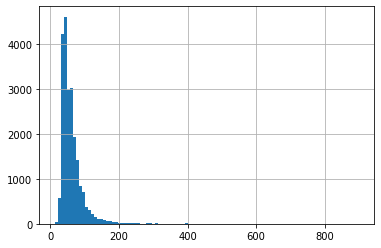

In [ ]:
df['total_area'].hist(bins=100)

Согласно гистограмме количество объявлений с площадью более 300 кв. м. мало, поэтому построим гистограмму еще раз

In [ ]:
print(len(df.query('total_area > 300')))

61


<AxesSubplot:>

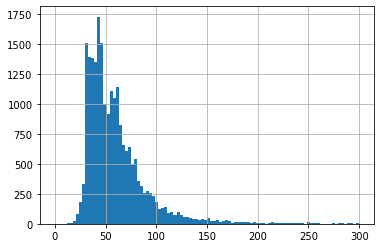

In [ ]:
df['total_area'].hist(bins=100, range=(0, 300))

In [ ]:
print(len(df.query('20 < total_area < 100')) / len(df['total_area']))

0.9134584935534947


Очевидно, большая часть объявлений это квартиры общей площадью от 20 до 100 кв. м., что составляет более 91% от всех объявлений.

### Посмотрим на цены объявлений.

Переведем цены в целые значения.

In [ ]:
df['last_price'].astype(int)

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
22100     1350000
22101     4600000
22102     9700000
22103     3100000
22104    11475000
Name: last_price, Length: 22105, dtype: int64

Посмотрим максимальное и минимальное значение цены а так же медиану и квартили.

In [ ]:
df['last_price'].describe()

count    2.210500e+04
mean     6.835543e+06
std      1.120383e+07
min      1.219000e+04
25%      3.600000e+06
50%      4.800000e+06
75%      6.999000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Немного неудобно... Однако, посчитав знаки, понимаем, что миниммальное значение 12190, максимальное 763 млн. Тем не менее основное количество объявлений вероятнее всего ограничивается пределами 10-15 млн., так как третий квартиль - 7 млн. Чтобы не потерять данный, перестрахуемся и построим гистограмму для значений до 30 млн.

Перед этим проверив объекты недвижимости стоимостью менее 1 млн.

In [ ]:
print(df.query('last_price < 1000000').count())

total_images               104
last_price                 104
total_area                 104
first_day_exposition       104
rooms                      104
ceiling_height              47
floors_total               104
living_area                 87
floor                      104
is_apartment               104
studio                     104
open_plan                  104
kitchen_area                82
balcony                    104
locality_name              104
airports_nearest             1
cityCenters_nearest          1
parks_around3000             1
ponds_around3000             1
days_exposition             85
ceiling_height_category    104
metr_cost                  104
floor_category             104
relation_living_area        87
relation_kitchen_area       82
weekday                    104
month                      104
year                       104
dtype: int64


Получаем чуть более ста квартир, одна из которых имеет значение в столбце "росстояние до центра", что говорит о том что только этот объект расположен в интересующей нас зоне. 

Построим гистограмму на 50 корзин.

<AxesSubplot:>

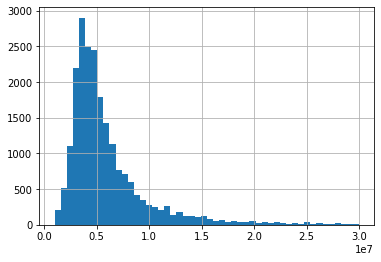

In [ ]:
redused_price = df.query('1000000 < last_price < 30000000')
redused_price['last_price'].hist(bins=50)

Стоимсоть почти всех объектов недвижимости входит в диапазон от 1 млн до 15, после чего колличество объектов реезко снижается, следовательно использование объявлений о продаже недвижимости более 15 - 20 млн может исказить реальные данные завышая среднюю стоимотсь недвижимости.

### Посмотрим на данные по числу комнат.

In [ ]:
df['rooms'].describe()

count    22105.000000
mean         2.076860
std          1.092998
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Здесь все кажется проще. Переведем в числовые значения и построим гистограмму.

<AxesSubplot:>

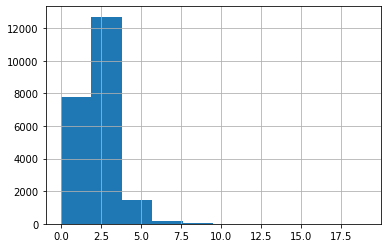

In [ ]:
df['rooms'].astype(int)
df['rooms'].hist(bins=10)

Большинство объявлений имеет от 1 до 3 комнат, иногда до 6. Значения выше встречаются крайне редко, о чем говорит факт, что медианное значение практически соответствует среднему.

### Высоту потолков я изучил на стадии предобратоки, и категаризировал данные по 4-ем категориям.

### Изучим время продажи объектов в соответствии с данными столбца 'days_exposition'.

In [ ]:
df['days_exposition'].describe()

count    19247.000000
mean       180.000987
std        220.337662
min          1.000000
25%         44.000000
50%         94.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Очень серьезно максимальное значение превышает максимальное значение третий квартиль. Похоже на вброс.

Построим гистограмму ограничив срок продажи 2 годами.

<AxesSubplot:>

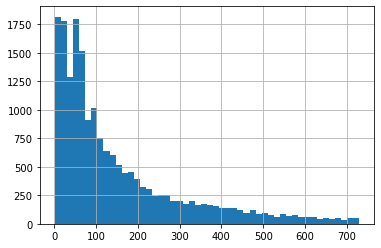

In [ ]:
df['days_exposition'].hist(bins=50, range=(1, 730))

Данные показывают, что более 50% объектов продаются в течении первых 100 дней после публикации объявления. После первых ста дней интенсивность продаж значительно снижается. Тем не достаточно много квртир продаются в течении 270 дней. После этого срока продажи можно считать черезвычайно долгими.

Чтобы определить очень быстрые продажи, гистограмму следует перестроить ограничив данные первыми 100-ми днями продаж.

<AxesSubplot:>

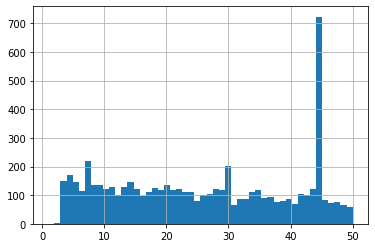

In [ ]:
df['days_exposition'].hist(bins=50, range=(1, 50))

Вероятнее всего быстрые продажи можем определить границами первого квартиля, а именно первые 43 дня.

### Проверим факторы влияющие на стоимость объектов недвижимости.

#### Начнем со связи между стоимостью и колличеством комнат.

In [ ]:
print(df.pivot_table(index = 'rooms', values = 'last_price', aggfunc='mean'))
print(df['last_price'].corr(df['rooms']))

         last_price
rooms              
0      3.396452e+06
1      3.953687e+06
2      5.902891e+06
3      8.516729e+06
4      1.376003e+07
5      2.429605e+07
6      3.181951e+07
7      5.147007e+07
8      5.022417e+07
9      3.415236e+07
10     2.616667e+07
11     2.525000e+07
12     4.200000e+08
14     2.682950e+07
15     6.500000e+07
16     2.850000e+07
19     3.225000e+07
0.36845292711287286


Корреляция показывает слабую связь. Однако, следует учитывать, что в таблице присутствуют данные об объявлениях из разных городов. Корректнее сравнение делать для каждого населенного пункта. Попоробуем на примере Санкт_петербурга.

In [ ]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
print(df_spb['last_price'].corr(df_spb['rooms']))

0.37237533826763347


Очевидно, корреляция по прежнему слабая.

Попробуем еще ограничить квартиры с самым частым колличеством комнат, а именно от 1 до 4.

In [ ]:
df_spb_rooms = df_spb.query('1 <= rooms <=3')
print(df_spb_rooms['last_price'].corr(df_spb_rooms['rooms']))

0.3020938868338423


Довольно странный получается вывод. Сводная таблица показывает рост средней стоимости квартиры с ростом числа комнат, однако корреляция остается достаточно низкой.

Есть предположение, что возможно несовсем уместно брать общую стоимость квартиры. Лучше вести расчеты основываясь на стоимости квадратного метра.

In [ ]:
df_spb_rooms = df_spb.query('1 <= rooms <=3')
print(df_spb_rooms['metr_cost'].corr(df_spb_rooms['rooms']))
print(df.pivot_table(index = 'rooms', values = 'metr_cost', aggfunc='mean'))

-0.03960727545644667
           metr_cost
rooms               
0      108513.114092
1      100818.265226
2       95489.659813
3       97151.150139
4      110331.605116
5      126750.342565
6      140718.807406
7      163569.923180
8      184651.168369
9      105027.145235
10      98009.931500
11     132639.736685
12     466666.666667
14      92827.682246
15     110169.491525
16     105555.555556
19      86091.831287


И снова мимо. Стоимость квадратного метра однокомнатной квартиры больше чем у двух- трех-комнатных.

Связь между стоимостью квартиры и количеством комнат несомненно есть, однако такая связь не является сильной.

In [ ]:
df_spb_rooms_cost = df_spb.query('1 <= rooms <=3 and 1000000 < last_price < 20000000')
print(df_spb_rooms['last_price'].corr(df_spb_rooms['rooms']))
print(df.pivot_table(index = 'rooms', values = 'last_price', aggfunc='mean'))

0.3020938868338423
         last_price
rooms              
0      3.337724e+06
1      3.835362e+06
2      5.591605e+06
3      8.179119e+06
4      1.342350e+07
5      2.376208e+07
6      3.170975e+07
7      5.147007e+07
8      5.022417e+07
9      3.415236e+07
10     2.616667e+07
11     2.525000e+07
12     4.200000e+08
14     2.682950e+07
15     6.500000e+07
16     2.850000e+07
19     3.225000e+07


Действительно, коеффициент корреляции отображает наличие связи между числом комнат истоимостью. Очевидно, выборка помогла установить связь.

Все-таки удалю из датафрейма очевидные вбросы по стоимости(менее 1000000 и более 20000000), так как эти данные будут искажать практически все дальнейшие исследования.

In [ ]:
df=df.query('1000000 < last_price < 20000000')

#### Проверим связь между ценой и этажом квартиры.

In [ ]:
print(df.pivot_table(index = 'floor_category', values = ['last_price', 'metr_cost'], aggfunc='mean'))

                  last_price     metr_cost
floor_category                            
другой          5.670178e+06  99291.576007
первый          4.486891e+06  81926.983248
последний       5.217859e+06  87929.031484


После удаления вбросов, данные немного изменились и мы можем увидеть что первый и последнии этаж имеют меньшую привлекательность для потенциальных покупателей.

Проведем схожие вычисления для Санкт_петербурга.

Перезапишем переменную df_spb, так как были удалены вбросы по цене.

In [ ]:
df_spb = df.query('locality_name == "Санкт-Петербург"')

In [ ]:
print(df_spb.pivot_table(index = 'floor_category', values = ['last_price', 'metr_cost'], aggfunc='mean'))

                  last_price      metr_cost
floor_category                             
другой          6.538601e+06  110427.908103
первый          5.465195e+06   97300.930405
последний       6.594387e+06  106599.439950


Очевидно, как средняя стомость квартир расположенных на первом этаже так и стоимость кв.м. ниже чем у квартир на других этажах.

array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'metr_cost'}>]], dtype=object)

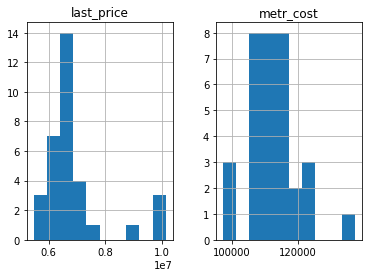

In [ ]:
df_spb.pivot_table(index = 'floor', values = ['last_price', 'metr_cost'], aggfunc='mean').hist()

array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'metr_cost'}>]], dtype=object)

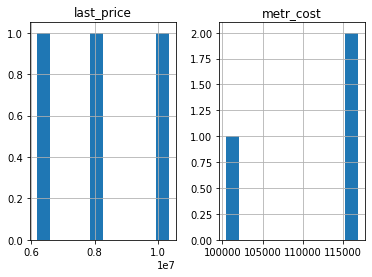

In [ ]:
df_spb.pivot_table(index = 'floor_category', values = ['last_price', 'metr_cost'], aggfunc='mean').hist()

Кажется, получилось не очень информативно.

#### Следующим этапом оценим связь стоимости квартир с их удаленностью от центра.
Для начала посмотрим какие значение встречаются в данном столбце.

In [ ]:
df['cityCenters_nearest'].describe()

count    17472.000000
mean     14502.436641
std       8576.918184
min        208.000000
25%       9820.000000
50%      13277.000000
75%      16464.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
df_spb['cityCenters_nearest'].describe()

count    14969.000000
mean     11862.100742
std       4739.069487
min        208.000000
25%       8922.000000
50%      12437.000000
75%      15032.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

Минимальное расстояние 181 метр, максимальное более 60 киллометров.
построим гистограмму для всех объявлений и для объявлении в Санкт-Петербурге и затем проверим связь методом корреляции.

<AxesSubplot:>

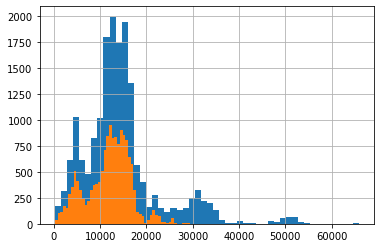

In [ ]:
df['cityCenters_nearest'].hist(bins=50)
df_spb['cityCenters_nearest'].hist(bins=50)

Получаем результат, что в Санкт-Петербург входят помещения расположенные в радиусе примерно 29,5 километров. Однако, некоторые населенные пункты указанные в таблицуе так же входят в указанный радиус.

И корреляция

In [ ]:
print(df['cityCenters_nearest'].corr(df['last_price']))

-0.3554185321054869


Сделаем вычисления для помещении в радиусе 20 км., так как это самые часто встречающиеся объявления.

In [ ]:
df_near_centre = df.query('cityCenters_nearest < 20000')
print(df_near_centre['cityCenters_nearest'].corr(df_near_centre['last_price']))

-0.4301072789700829


Небольшой отрицательные коэффициент корреляции есть, что логично. Стоимость снижается по мере удаления от центра, хотя о сильной связи этих показателей говорить нельзя.

Попробуем сделать сводную таблицу по этим данным, перед этим разделив растояние до центра на 4 категории.

In [ ]:
def centre_cat(row):
    category = row['cityCenters_nearest']
    if (category < 7000):
        return 'до 7 км'
    if (7000 <= category < 20000):
        return 'от 7 до 20 км'
    if (20000 <= category <= 36000):
        return 'от 20 до 36 км'
    if (category > 36000):
        return 'больше 36 км'
    
df['centre_cat'] = df.apply(centre_cat, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_height_category,metr_cost,floor_category,relation_living_area,relation_kitchen_area,weekday,month,year,centre_cat
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,NaN,2.4-2.8,120370.370370,другой,0.472222,0.231481,Четверг,3,2019,от 7 до 20 км
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,81.0,2.4-2.8,82920.792079,первый,0.460396,0.272277,Вторник,12,2018,от 7 до 20 км
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,558.0,2.4-2.8,92785.714286,другой,0.612500,0.148214,Четверг,8,2015,от 7 до 20 км
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,2.9-3.6,100000.000000,другой,0.320000,0.410000,Вторник,6,2018,от 7 до 20 км
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,False,...,55.0,2.4-2.8,95065.789474,другой,0.473684,0.299342,Понедельник,9,2018,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,NaN,more 3.6,72490.845228,другой,0.547792,0.103356,Вторник,3,2017,до 7 км
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,45.0,2.4-2.8,52542.372881,другой,0.644068,0.144068,Понедельник,1,2018,None
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,2.4-2.8,44091.710758,первый,0.523810,NaN,Воскресенье,2,2018,None
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,602.0,2.9-3.6,149511.400651,другой,NaN,0.303583,Вторник,3,2017,от 7 до 20 км


In [ ]:
print(df.pivot_table(index='centre_cat', values=['last_price', 'metr_cost']))

                  last_price      metr_cost
centre_cat                                 
больше 36 км    4.134868e+06   79396.605560
до 7 км         9.214966e+06  122832.945238
от 20 до 36 км  4.771314e+06   86308.735149
от 7 до 20 км   5.770931e+06  105351.870227


Предположение верно! Чем ближе к центру тем выше средняя стоимость как кв.м. так и общая средняя стоимость объекта.

#### Теперь посмотрим на связ между стоимостью объекта и датой публикации.

In [ ]:
print(df.pivot_table(index=['weekday'], values=['last_price', 'metr_cost']))

               last_price     metr_cost
weekday                                
Воскресенье  5.302517e+06  94841.147147
Вторник      5.509981e+06  96045.602267
Понедельник  5.423551e+06  95299.016556
Пятница      5.407724e+06  95570.014708
Среда        5.552241e+06  96371.030904
Суббота      5.323191e+06  94778.443637
Четверг      5.547525e+06  95420.570508


<AxesSubplot:xlabel='weekday'>

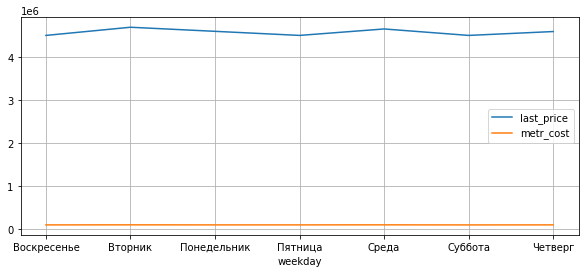

In [ ]:
df.pivot_table(index=['weekday'], values=['last_price', 'metr_cost'], aggfunc='median').plot(grid=True, figsize=(10, 4))

Как общая стоимость, так и стоимость кв.м. квартир практически не меняется в течение недели. Возможнов воскресение есть совсем небольшое снижение.

In [ ]:
print(df.pivot_table(index=['month'], values=['last_price', 'metr_cost'], aggfunc='median'))

       last_price     metr_cost
month                          
1       4550000.0  94736.842105
2       4600000.0  94495.412844
3       4600000.0  94866.677123
4       4750000.0  95810.595558
5       4500000.0  92282.051282
6       4350000.0  92215.053763
7       4600000.0  94285.714286
8       4500000.0  95310.884429
9       4650000.0  95223.051410
10      4526000.0  93750.000000
11      4600000.0  94839.960641
12      4600000.0  93362.068966


<AxesSubplot:xlabel='month'>

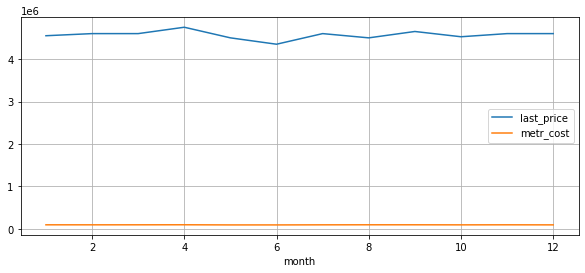

In [ ]:
df.pivot_table(index=['month'], values=['last_price', 'metr_cost'], aggfunc='median').plot(grid=True, figsize=(10, 4))

Наблюдаем похожую картину. Стоимость кв.м. неизменна в течении всего года, а вот общая средняя стоимость квартир подвергается некоторым флуктуациям и достигает пикового значения в апреле, а минимального в июне.

In [ ]:
print(df.pivot_table(index=['year'], values=['last_price', 'metr_cost'], aggfunc='median'))

      last_price      metr_cost
year                           
2014   6500000.0  103489.059728
2015   5150000.0   91772.151899
2016   4480000.0   91000.000000
2017   4450000.0   91851.285190
2018   4550000.0   95512.820513
2019   5000000.0  102727.272727


И здесь добавим линейный граффик.

<AxesSubplot:xlabel='year'>

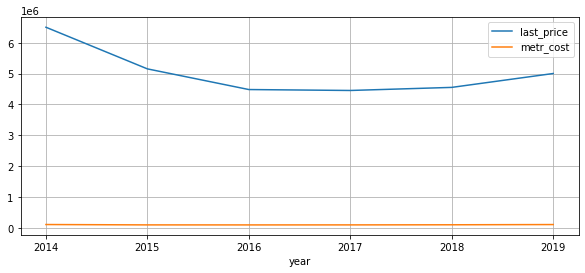

In [ ]:
df.pivot_table(index=['year'], values=['last_price', 'metr_cost'], aggfunc='median').plot(grid=True, figsize=(10, 4))

Данные показывают значительное снижение стоимости недвижимости в 14-16 годах со средней стоимсоти более 12,7 млн в 2014 до почти 9 млн в 2015 и до чуть более 7 млн в 2016 году. После чего средняя стоимость недвижимости нормализовалась и составила около 6-7 млн в последующие годы.

### Выберем 10 населенных пунктов с наибольшим колличеством объявлений.

In [ ]:
print(cities.head(10))

                   count
locality_name           
Санкт-Петербург    15721
поселок Мурино       556
поселок Шушары       440
Всеволожск           398
Пушкин               369
Колпино              338
поселок Парголово    327
Гатчина              307
деревня Кудрово      299
Выборг               237


Создадим новый датафрейм по укзанным населенным пунктам.

In [ ]:
cities_10 = cities.query('count >= 237')
df_cities = df.query('locality_name in @cities_10.index')

#### Посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [ ]:
df_cities['metr_cost'].describe()

count     18270.000000
mean     103656.353507
std       28341.684561
min       10507.246377
25%       85555.555556
50%       99980.384615
75%      117100.608009
max      600000.000000
Name: metr_cost, dtype: float64

Средняя стоимость кв.м. около 147 тыс, что превыает медианную стоимость, которая составляет около 135 тысяч.

Чтобы определить населенные пункты с самой высокой и самой низкой средней стоимостью недвижимости, следует создать сводную таблицу.

In [ ]:
df_cities.pivot_table(index='locality_name', values=['last_price', 'metr_cost']).sort_values('last_price', ascending=False)

,last_price,metr_cost
locality_name,,
Санкт-Петербург,6.433710e+06,108615.283166
Пушкин,5.899603e+06,101788.572053
поселок Парголово,4.488075e+06,90175.913458
деревня Кудрово,4.234158e+06,92473.547576
поселок Шушары,4.108082e+06,78677.364217
Колпино,3.866289e+06,75333.295801
Всеволожск,3.744117e+06,67275.592779
поселок Мурино,3.652361e+06,85681.762601
Гатчина,3.496959e+06,68935.194838


Ожидаемо, город с самой высокой средней стоимостю недвижимости - Санкт_петербург. Самая низкая стоимость недвижимости из списка в Выборге.

Создадим отдельный столбец в датафрейме с расстоянием до центра в километрах.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df_spb['centre_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['centre_km'] = df_spb['centre_km'].round()
display(df_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_height_category,metr_cost,floor_category,relation_living_area,relation_kitchen_area,weekday,month,year,centre_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,NaN,2.4-2.8,120370.370370,другой,0.472222,0.231481,Четверг,3,2019,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,558.0,2.4-2.8,92785.714286,другой,0.612500,0.148214,Четверг,8,2015,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,2.9-3.6,100000.000000,другой,0.320000,0.410000,Вторник,6,2018,8.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,2.4-2.8,110544.692737,другой,NaN,0.263966,Четверг,4,2019,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,289.0,2.4-2.8,88524.590164,другой,0.714754,0.106557,Воскресенье,2,2017,15.0


Посчитаем среднюю цену для каждого километра.

In [ ]:
price_km = df_spb.pivot_table(index='centre_km', values=['metr_cost'])
print(price_km)

               metr_cost
centre_km               
0.0        118153.215310
1.0        129643.925472
2.0        122138.107993
3.0        112994.403271
4.0        120668.307919
5.0        125342.390243
6.0        126724.902726
7.0        123837.738523
8.0        121442.994158
9.0        110442.247045
10.0       111223.571123
11.0       107316.646959
12.0       107119.390603
13.0       107688.318077
14.0       104177.427410
15.0       103912.724766
16.0       100184.199692
17.0        96309.492256
18.0        96308.935932
19.0        98652.736027
20.0       103045.181922
21.0        94469.584582
22.0        91330.425050
23.0        91828.517765
24.0        85736.904595
25.0        91531.371618
26.0        89285.876593
27.0       132115.709459
28.0        81161.915320
29.0        72953.365445


Построим график изменения цены по километрам.

<AxesSubplot:xlabel='centre_km'>

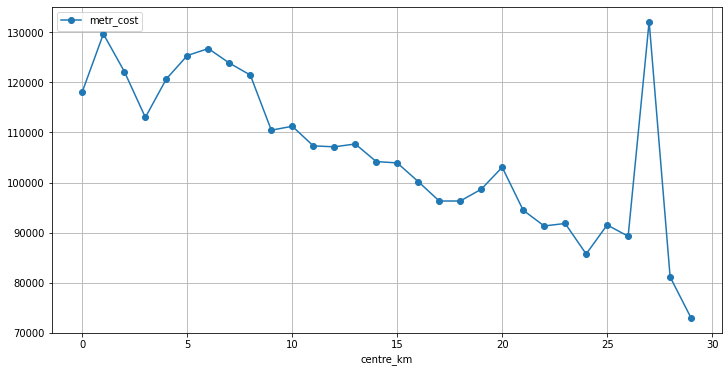

In [ ]:
import matplotlib.pyplot as plt
price_km.plot(style='o-', grid=True, figsize=(12, 6))

Центральная зона  характеризуется значительным снижением стоимости и резкими скачками по причине неоднородности. Соответственно граница определяется изменением поведения графика на более пологое снижение.
    
Следовательно граница в 10 км кажеется наиболее логичной.

#### Проанализируем квартиры расположенные в центре Санкт-Петербурга.

Создадим новый датафрейм с условием расстояния объекта недвижимости не более 3 км от центра.

In [ ]:
df_sbp_centr = df_spb.query('cityCenters_nearest <= 10000')
display(df_sbp_centr.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_height_category,metr_cost,floor_category,relation_living_area,relation_kitchen_area,weekday,month,year,centre_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,2.9-3.6,100000.000000,другой,0.320000,0.410000,Вторник,6,2018,8.0
21,13,3200000.0,31.6,2018-03-14,1,NaN,5.0,16.9,2,False,...,310.0,2.4-2.8,101265.822785,другой,0.534810,0.180380,Среда,3,2018,10.0
24,8,6500000.0,97.2,2015-10-31,2,NaN,3.0,46.5,1,False,...,265.0,2.4-2.8,66872.427984,первый,0.478395,0.201646,Суббота,10,2015,2.0
35,6,15500000.0,149.0,2017-06-26,5,NaN,5.0,104.0,4,False,...,644.0,2.4-2.8,104026.845638,другой,0.697987,0.114094,Понедельник,6,2017,4.0
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,2,False,...,NaN,2.9-3.6,86727.941176,последний,0.691176,0.080882,Пятница,9,2017,7.0


Изучим в новом датафрейме данные по площади, цене, числу комнат, высоте потолков.

In [ ]:
df_sbp_centr['total_area'].describe()

count    4462.000000
mean       71.793557
std        32.989198
min        12.000000
25%        46.800000
50%        66.000000
75%        88.375000
max       309.700000
Name: total_area, dtype: float64

<AxesSubplot:>

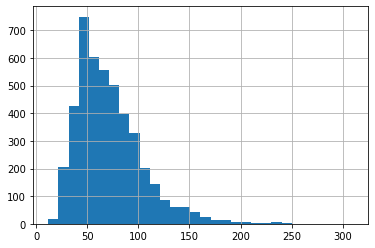

In [ ]:
df_sbp_centr['total_area'].hist(bins=30)

Большая часть представленных квартир в центре Санкт_петербурга имеют площадь от 35 да 100 кв.м. Однако, достаточно многоквартир площадью до 200 метров.

In [ ]:
df_sbp_centr['last_price'].describe()

count    4.462000e+03
mean     8.375045e+06
std      3.876235e+06
min      1.600000e+06
25%      5.400000e+06
50%      7.500000e+06
75%      1.054750e+07
max      1.999900e+07
Name: last_price, dtype: float64

После удаления вбросов по цене отклонения не кажутся большими. Все данные выглядят предельно логично.

<AxesSubplot:>

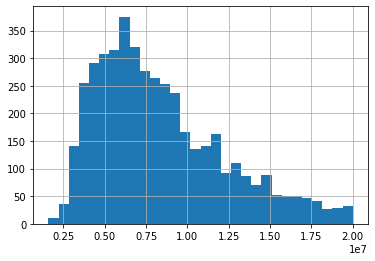

In [ ]:
#df_sbp_centr['last_price'].hist(bins=30, range=(3000000, 20000000))
df_sbp_centr['last_price'].hist(bins=30)

Увеличение размеров центра до радиуса в 10 км. немного изменили данные. Мы видим больший диапазан цен, где наибольшее количество объявлений предствлено в диапазоне от 4 до 9 млн. Врядли на эти данные можно серьезно ссылаться, так как некорректно их оценивать в разрыве от площади квартиры либо количества комнат.

In [ ]:
df_sbp_centr['rooms'].describe()

count    4462.000000
mean        2.435231
std         1.181451
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

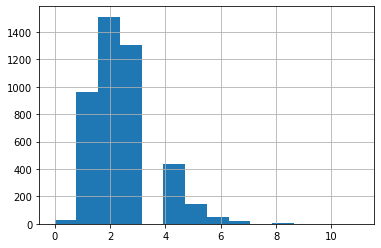

In [ ]:
df_sbp_centr['rooms'].hist(bins=14)

Квартиры в центре Санкт_петербургачаще имеют от 2 до 5 комнат, значительно реже 1, 6,7 и практически единичные случаи, когда комнат больше.

In [ ]:
df_sbp_centr['ceiling_height'].describe()

count    2899.000000
mean        3.038700
std         2.094204
min         2.000000
25%         2.700000
50%         3.000000
75%         3.180000
max       100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

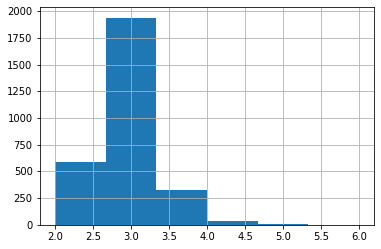

In [ ]:
df_sbp_centr['ceiling_height'].hist(bins=6, range=(2, 6))

С высотой потолков тоже все предельно логично. Основная часть квартир в центре имеет потолки от 2.5 до 3.6 м.

### Оценим влияние различных факторов на стоимость квартир  в центре.

#### Начнем с удаленности от центра.

<AxesSubplot:xlabel='centre_km'>

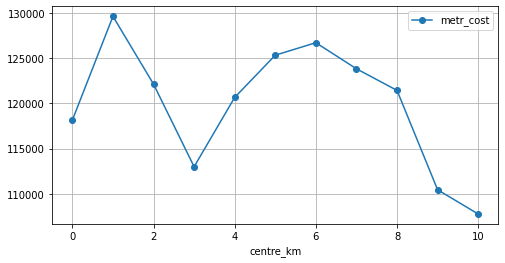

In [ ]:
price_km_centre = df_sbp_centr.pivot_table(index='centre_km', values=['metr_cost'])
price_km_centre.plot(style='o-', grid=True, figsize=(8, 4))

Общее снижение стоимости объектов недвижимости в связи с удалением от центра, несмотря на флуктуации.

Посчитаем корреляцию.

In [ ]:
print(df_sbp_centr['centre_km'].corr(df_sbp_centr['metr_cost']))

-0.09835426932188475


Очень слабая связь, не смотря на общую тенденцию. Видимо на расстоянии 3 км от центра есть какая-то непопулярная зона, приводящая к снижению стоимости квартир.

#### Оценим связь между количеством комнат и средней стоимостью.

<AxesSubplot:xlabel='rooms'>

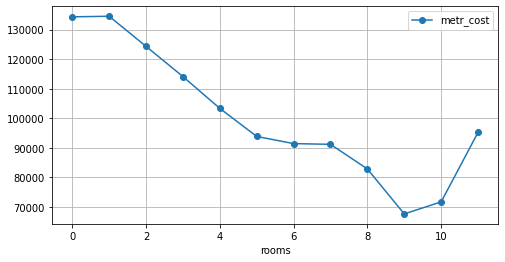

In [ ]:
price_rooms_centre = df_sbp_centr.pivot_table(index='rooms', values=['metr_cost'])
price_rooms_centre.plot(style='o-', grid=True, figsize=(8, 4))

Корреляция

In [ ]:
print(df_sbp_centr['rooms'].corr(df_sbp_centr['metr_cost']))

-0.31880246840945886


Наблюдаем отрицательную корреляцию, что логино. По мере увеличения количества комнат стоимость кв.м. падает. что кажется логичным. Небольшие квартиры более ликвидны и легче продаются. В тоже время видим всплеск на одиннадцати - комнатные квариры. Довольно странно. Посмотрим на их колличество, возможно вброс.

In [ ]:
print(len(df_sbp_centr.query('rooms > 9')))

2


Игноримруем. 
    

#### Проверим связь с этажом.

<AxesSubplot:xlabel='floor'>

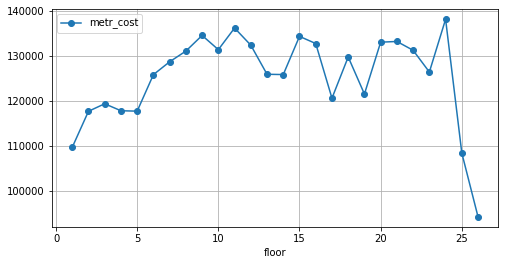

In [ ]:
price_floor_centre = df_sbp_centr.pivot_table(index='floor', values=['metr_cost'])
price_floor_centre.plot(style='o-', grid=True, figsize=(8, 4))

И на этом графике мы видим очевидную связь между стоимостью кв.м. и этажом. Странно, но чем выше расположен объект недвижимости, тем выше средняя стоимость кв.м. Причем после 5 этажа наблюдается ЗНАЧИТЕЛЬНЫЙ рост.

Корреляция

In [ ]:
print(df_sbp_centr['floor'].corr(df_sbp_centr['metr_cost']))

0.13494065196874194


Логично

In [ ]:
price_floor_df = df.pivot_table(index='floor_category', values=['metr_cost'])
price_floor_df

,metr_cost
floor_category,
другой,99291.576007
первый,81926.983248
последний,87929.031484


Действительно, в целом по датафрейму наблюдается значительное (около 10%) снижение стоимости кв.м. квартир на последнем этаже.

In [ ]:
print(len(df_sbp_centr.query('floor>5')))

1082


Объявлений не мало, думаю статистике можно верить.

#### Ну и оценим изменение стоимости от даты публикации.

<AxesSubplot:xlabel='first_day_exposition'>

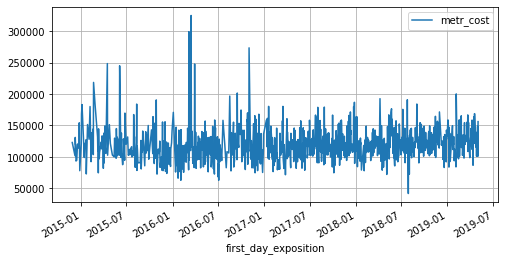

In [ ]:
price_date_centre = df_sbp_centr.pivot_table(index='first_day_exposition', values=['metr_cost'])
price_date_centre.plot(grid=True, figsize=(8, 4))

И снова мы видим флуктуации графика с несколькими всплесками(вбросами). Это говорит о том что средняя стоимость кв.м. в центре Санкт_Петербурга не зависит от даты публикации и остается практически неизменной в течении всего периода указанного в датафрейме.

Понятно, связи я не обнаружил, за исключением значительного спада стоимости в 14-16 годах. Очевидно, данный факт был вызван какими-то внешними политеческими или социальными факторами. 
    
Наверное, нет смысла составлять линейные графики снова.

## Общий вывод

<font size="5"> Исходя из исследованиий можно сделать следующие выводы: </font>
1. Средняя стоимость квартир остается неизменной вне зависимости от даты публикации после снижения общей стоимости в 14-15 годах.
2. Самая высокая средняя стоимость квартир в центре Санкт_Петербурга, который ограничивается радиусом в ~~три километра~~ километров. Самые приближенные к центру квартиры имеют среднюю стоимость квадратного метра около 325 тысяч и снижается до примерно 150 тысяч за метр на расстоянии 3 километра от центра.
3. Так же обнаружена сильная связь между стоимостью недвижимости в центре Санкт-Петербурга и ее этажом. Самая низкая стоимость у квартир, расположенных на 1 этаже затем стоимость растет незначительно для 2-5 этажей, после чего мы можем наблюдать значительный рост стоимости кв.м. по мере роста этажа помещения.
4. За пределами центра Санкт_петербурга так же заметно снижение стоимости кв.м. по мере удаленности от ~~3-х~~ 10-ти километрового центра. Однако общее снижение стоимости не такое значительное как в центре. Таким образом для определения стоимости этих квартир удаленность от центра не является решающим фактором. 
5. Высота потолков не влияет на стоимость недвижимости.
6. Число комнат, как и площадь не влияет на изменение стоимости, так как базовое значение стоимости недвижимости основывается на стоимости квадратного метра. 
7. Наличие баклконов так же не принято во внимание, так как только около трети квартир имеют балконы.
8. ~~Колонка 'is_appartment' была проигнорирована, так как практически все значения в ней пропущены и ее заполнение показалось не возможным.~~
9. Не совсем понятным оказалось задание "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили". Я игнорировал выбивающиеся значения либо методом 'query' либо методом 'range()' при построении гистограмм.




    
10. Очевидно, данные были сильно подвргнуты вбросам по  квартирам стоимостью менее 1000000 и более 20000000 которые были удалены методо query. Так же мной были проигнорированы квартиры имеющие 10 и более комнат, так же искажающие реальные данные.
11. Форматирование колонки 'locality_name' (замена ё на е) позволило уменьшить число уникальных значений, что в итоге позволило сохранить большее количество данных и получить более точные данные для иследования.
